### Templates and masks

**Learning outcomes:**
- How to load a template image and a mask with ants.
- How to mask a brain using ants.
- Inspect visually region delimited by a mask.

In [1]:
%matplotlib inline

import os
from helpers import *

import ants
# noinspection PyPep8Naming
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.5.4
SimpleITK version = 2.4.1


In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(f'project folder = {BASE_DIR}')

project folder = /home/younes/PycharmProjects/MRI-preprocessing-techniques


#### Template example

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

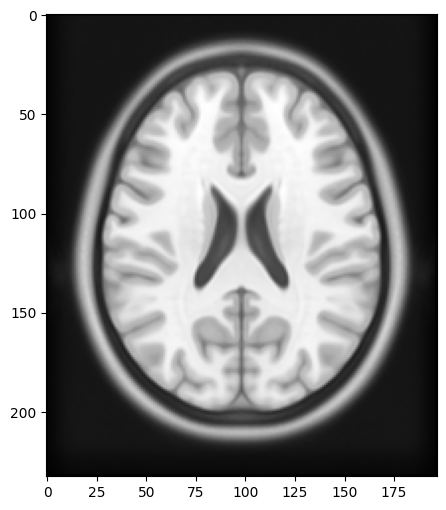

In [3]:
template_img_path = os.path.join(BASE_DIR, 'assets', 'templates', 'mni_icbm152_t1_tal_nlin_sym_09a.nii')
template_img_ants = ants.image_read(template_img_path, reorient='IAL')

explore_3D_array(arr = template_img_ants.numpy())

In [4]:
print('\t\tTEMPLATE IMG')
print(template_img_ants)


		TEMPLATE IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (189, 233, 197)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, -98.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



#### Brain mask

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

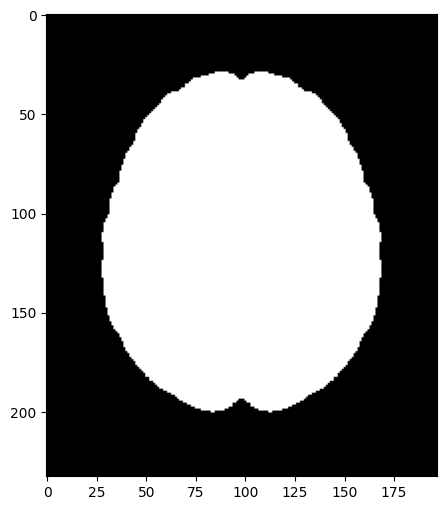

In [5]:
brain_mask_img_path = os.path.join(BASE_DIR, 'assets', 'templates', 'mni_icbm152_t1_tal_nlin_sym_09a_mask.nii')
brain_mask_img_ants = ants.image_read(brain_mask_img_path, reorient='IAL')

explore_3D_array(arr = brain_mask_img_ants.numpy())

In [6]:
print('\t\tTEMPLATE IMG')
print(template_img_ants)

print('\t\tBRAIN MASK IMG')
print(brain_mask_img_ants)

		TEMPLATE IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (189, 233, 197)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, -98.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

		BRAIN MASK IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (189, 233, 197)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, -98.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



#### Mask out the brain

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

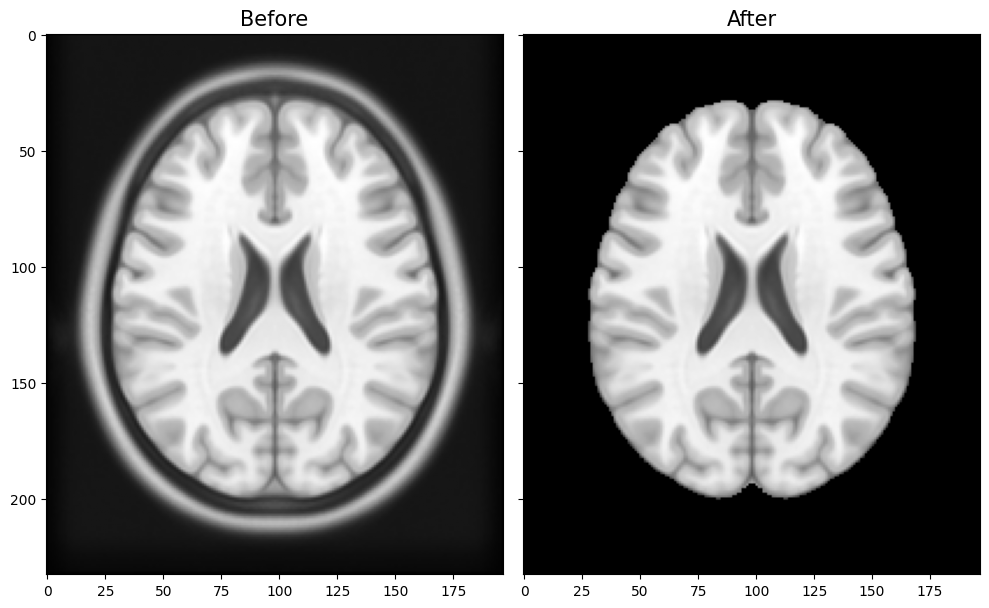

In [7]:
brain_masked = ants.mask_image(template_img_ants, brain_mask_img_ants)

explore_3D_array_comparison(template_img_ants.numpy(), brain_masked.numpy())

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

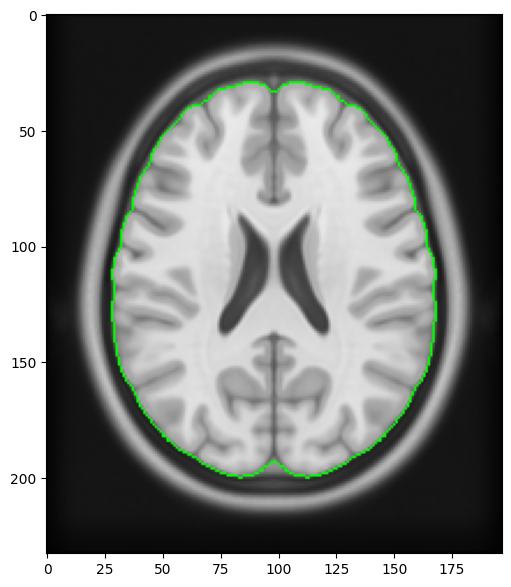

In [8]:
explore_3D_array_with_mask_contour(template_img_ants.numpy(), brain_mask_img_ants.numpy())

#### Brain Lesion example

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

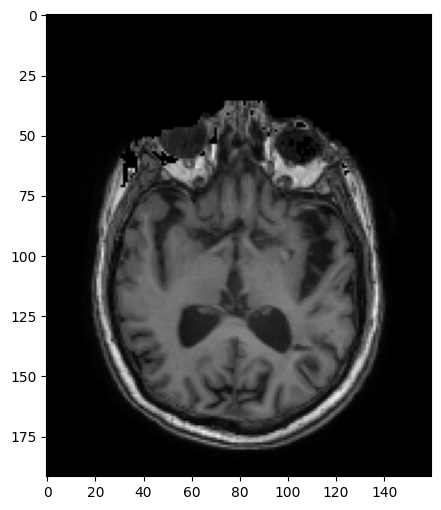

In [9]:
raw_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', 'brain-lesion_T1w.nii.gz')
raw_img_ants = ants.image_read(raw_img_path, reorient='IAL')

explore_3D_array(arr = raw_img_ants.numpy())

#### Tissue mask

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

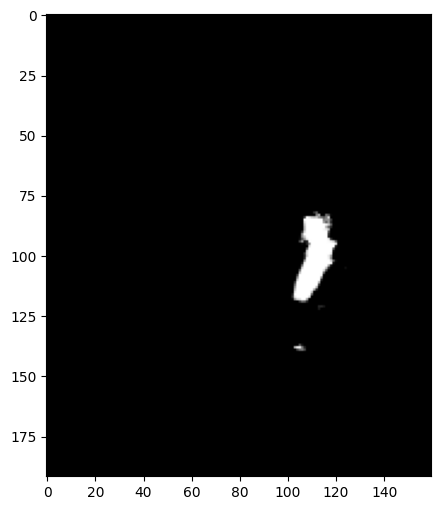

In [10]:
mask_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', 'brain-lesion_T1w_mask.nii.gz')
mask_img_ants = ants.image_read(mask_img_path, reorient='IAL')

explore_3D_array(arr = mask_img_ants.numpy())

In [11]:
print('\t\tRAW IMG')
print(raw_img_ants)

print('\t\tMASK IMG')
print(mask_img_ants)

		RAW IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (98.1114, -149.1525, -129.5975)
	 Direction  : [-0.  0. -1.  0.  1.  0.  1.  0.  0.]

		MASK IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (98.1114, -149.1525, -129.5975)
	 Direction  : [-0.  0. -1.  0.  1.  0.  1.  0.  0.]



interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

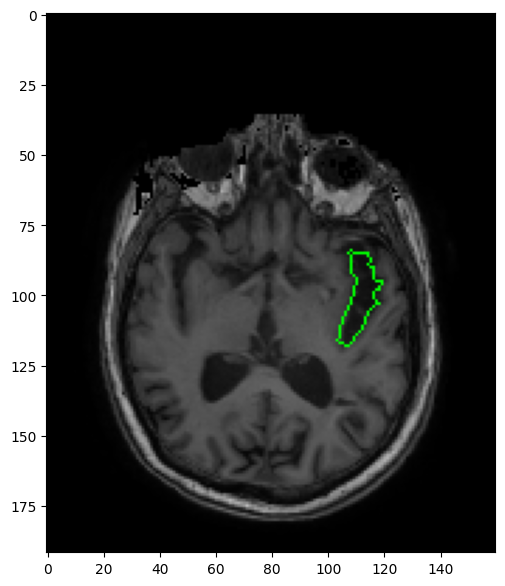

In [12]:
explore_3D_array_with_mask_contour(raw_img_ants.numpy(),mask_img_ants.numpy())